In [28]:
from astropy.stats import sigma_clipped_stats, SigmaClip
from astropy.io import fits
from photutils.segmentation import detect_threshold, detect_sources
from photutils.utils import circular_footprint
import numpy as np
import logging
import matplotlib.pyplot as plt


filepath = 'D:/astro_images/physik_thesis/scripts/astroUnets/our_data/training/originals/ibya10020_drz.fits'

In [59]:
def calculate_image_stats(data: np.ndarray, sigma: float = 3.0, nsigma: float = 2.0, 
                          npixels: int = 10, footprint_radius: int = 10, maxiters: int = 10):
    """
    Calculate sigma-clipped statistics (mean, median, std) of the background in an image.
    Parameters:
        data (np.ndarray): Input 2D image data.
        sigma (float): Sigma for sigma-clipping (default is 3.0).
        nsigma (float): Threshold level for object detection (default is 2.0).
        npixels (int): Minimum number of connected pixels to detect a source (default is 10).
        footprint_radius (int): Radius of the circular footprint used for masking sources (default is 10).
    Returns:
        tuple: A tuple containing (mean, median, std) of the background.
    """
    if data is None:
        return
    
    try:
        abs_mean = np.mean(data)
        sigma_clip = SigmaClip(sigma=sigma, maxiters=maxiters)
        threshold = detect_threshold(data, nsigma=nsigma, sigma_clip=sigma_clip)
        segment_img = detect_sources(data, threshold, npixels=npixels)
        footprint = circular_footprint(radius=footprint_radius)
        mask = segment_img.make_source_mask(footprint=footprint)
        mask = ~mask
        mean, median, std = sigma_clipped_stats(data, sigma=sigma, mask=mask)
        
        # Count points below and above the threshold
        below_threshold = np.sum(data < threshold)
        above_threshold = np.sum(data >= threshold)
        total_points = data.size
        
        below_percentage = (below_threshold / total_points) * 100
        above_percentage = (above_threshold / total_points) * 100
        
        # Print the counts and percentages
        print(f"Points below threshold: {below_threshold} ({below_percentage:.2f}%)")
        print(f"Points above threshold: {above_threshold} ({above_percentage:.2f}%)")

        # Plot the segmentation image
        plt.figure(figsize=(10, 8))
        plt.imshow(segment_img.data, cmap='tab20', origin='lower')  # 'tab20' for discrete colors
        plt.colorbar(label='Segment Labels')
        plt.title('Segmentation Image')
        plt.xlabel('X Pixel')
        plt.ylabel('Y Pixel')
        plt.show()
        
        return (mean, median, std, abs_mean), np.array(mask).reshape(data.shape)
    except Exception as err:
        # logging.warning(f'An error occurred while masking the light source: {err}')
        return (np.nan, np.nan, np.nan, np.nan), np.zeros(data.shape)

    

def open_fits(filepath, type_of_image='SCI'):
    try:
        with fits.open(filepath) as f:
            out, ex_time = None, None
            
            for hdu in f:
                if isinstance(hdu, (fits.PrimaryHDU, fits.ImageHDU, fits.CompImageHDU)) and isinstance(hdu.data, np.ndarray):
                    if out is None and type_of_image.lower() == str(hdu.name).lower():
                        out = hdu.data
                if ex_time is None and 'EXPTIME' in hdu.header:
                    ex_time = hdu.header['EXPTIME']
                if out is not None and ex_time is not None:
                    break
            if out is None or ex_time is None:
                return None
            
            return out, filepath, ex_time
    except Exception as err:
        logging.warning(f'Error occurred while reading the .fits file: {err}')
        return None

Points below threshold: 1185423 (83.60%)
Points above threshold: 232601 (16.40%)


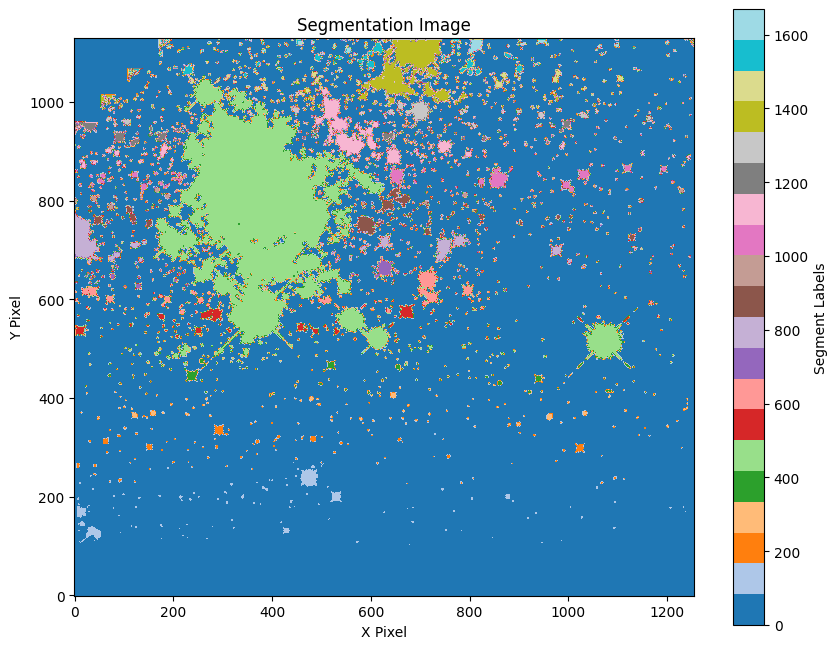

In [60]:
data, filepath, ex_time = open_fits(filepath, type_of_image='SCI')
data = np.nan_to_num(data, nan=0.0, posinf=0.0, neginf=0.0)
(mean, median, std, abs_mean), masked = calculate_image_stats(data)

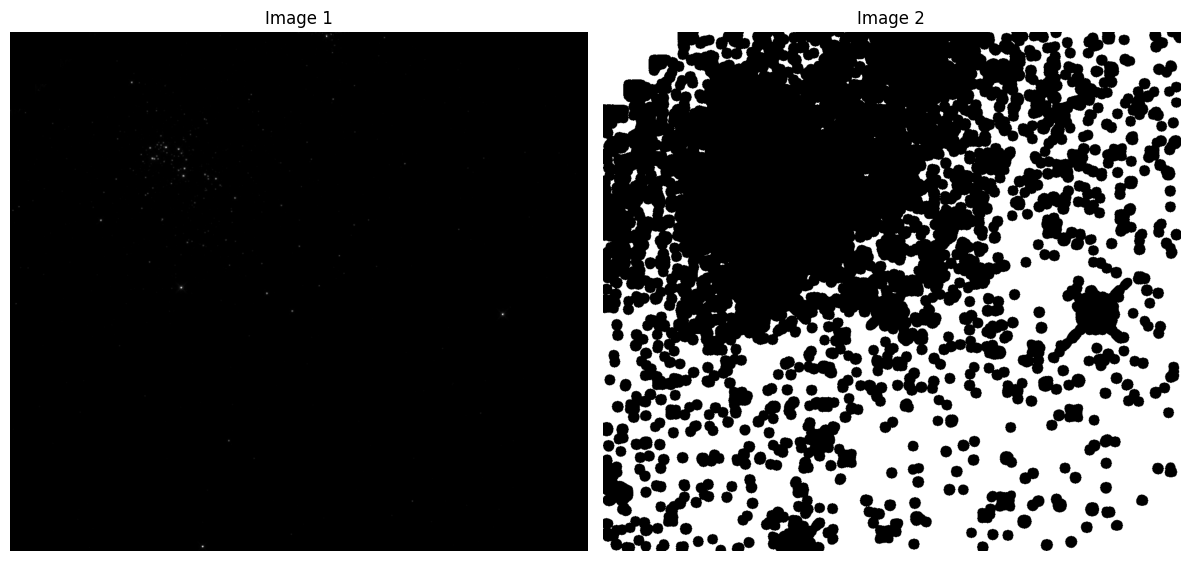

In [ ]:
plt.figure(figsize=(12, 6)) 
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.imshow(data, cmap='gray', origin='lower', vmin=0, vmax=data.max())  # Adjust vmin/vmax as needed
plt.title("Image 1")
plt.axis("off")  # Hide axes

# Plot the second image
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.imshow(masked, cmap='gray', origin='lower', vmin=0, vmax=1)  # Same vmin/vmax for consistency
plt.title("Image 2")
plt.axis("off")  # Hide axes

# Display the plot
plt.tight_layout()  # Adjust spacing between subplots
plt.show()


In [1]:
import pandas as pd

filepath = 'cropped_images_stats.csv'
df = pd.read_csv(filepath)

for col in df.columns:
    print(col)

sci_data_set_name
sci_targname
sci_hapnum
sci_haspnum
sci_instrume
sci_aper_1234
sci_spec_1234
sci_actual_duration
sci_start_time
sci_pep_id
sci_pi_last_name
sci_ra
sci_dec
sci_refnum
sci_central_wavelength
sci_release_date
sci_stop_time
sci_preview_name
scp_scan_type
sci_hlsp
URL
drz_URL
original_filename
filename
location
mean
median
std
abs_mean
0_mean_x
0_median_x
0_std_x
5_mean_x
5_median_x
5_std_x
10_mean_x
10_median_x
10_std_x
15_mean_x
15_median_x
15_std_x
21_mean_x
21_median_x
21_std_x
26_mean_x
26_median_x
26_std_x
31_mean_x
31_median_x
31_std_x
36_mean_x
36_median_x
36_std_x
42_mean_x
42_median_x
42_std_x
47_mean_x
47_median_x
47_std_x
52_mean_x
52_median_x
52_std_x
57_mean_x
57_median_x
57_std_x
63_mean_x
63_median_x
63_std_x
68_mean_x
68_median_x
68_std_x
73_mean_x
73_median_x
73_std_x
78_mean_x
78_median_x
78_std_x
84_mean_x
84_median_x
84_std_x
89_mean_x
89_median_x
89_std_x
94_mean_x
94_median_x
94_std_x
100_mean_x
100_median_x
100_std_x
org_mean
org_median
org_std
org_

C:\Users\admin\AppData\Local\Temp\ipykernel_29584\1329744390.py:4: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)
